# Data Analysis of  GARANTI BBVA 

GARANTI BBVA is a bank based in Turkey. It is a most important member of the Turkish banking system.  Today, it is working with Banco Bilbao Vizcaya Argentaria (BBVA) partnership, which is the Spanish bank. In here, we analyzed stock history of GARANTI for 32 months, from 2020-02-01 to 2022-09-23. This data includes date, Open, High, Low, Close, Adj Close and Volume values. Also with this work, we analyzed income values of bank in the same dates.

The Stock History data from Yandex Finance.

The Income data from KAP. 


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabula import read_pdf

In [2]:
stock_hist = pd.read_csv("/Users/batuhanyolver/Downloads/GARAN.IS.csv")

In [3]:
stock_hist.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-01,11.96,12.62,8.79,9.54,9.146201,854973062
1,2020-03-01,9.90,10.62,6.76,8.17,7.832754,1970202565
2,2020-04-01,7.99,8.94,7.47,8.33,7.986149,2538130051
3,2020-05-01,8.33,8.33,7.51,7.85,7.525962,2083406205
4,2020-06-01,7.93,8.65,7.89,8.48,8.129956,3176554221


In [4]:
def null_check(data):
    counter = 0
    for x in range(0,len(data)):
        if (True in data.iloc[x].isnull()):
            print(data.iloc[x], "Warning!!")
            counter += counter + 1
        else:
            pass
                
    if counter == 0:
        print("The data do not has NaN values")

In [5]:
null_check(stock_hist)

The data do not has NaN values


In [6]:
# Simple candlestick graph for Stock data

In [9]:
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=stock_hist['Date'],
                open=stock_hist['Open'],
                high=stock_hist['High'],
                low=stock_hist['Low'],
                close=stock_hist['Close'])])

fig.write_image("fig1.png")

fig.show()

In [11]:
from PIL import Image

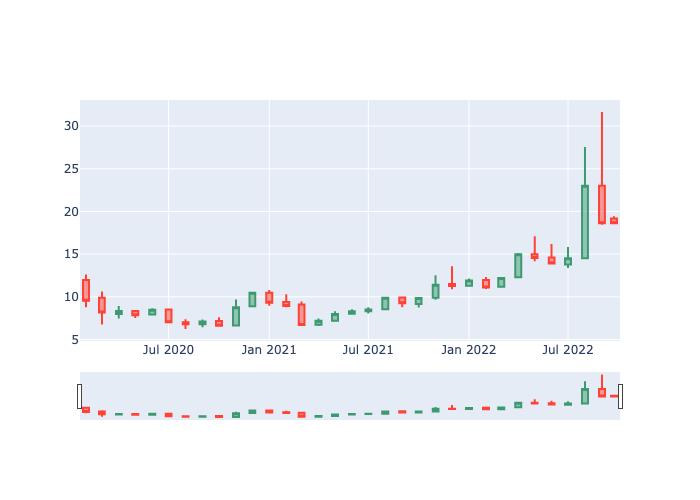

In [13]:
image= Image.open("fig1.png")
image

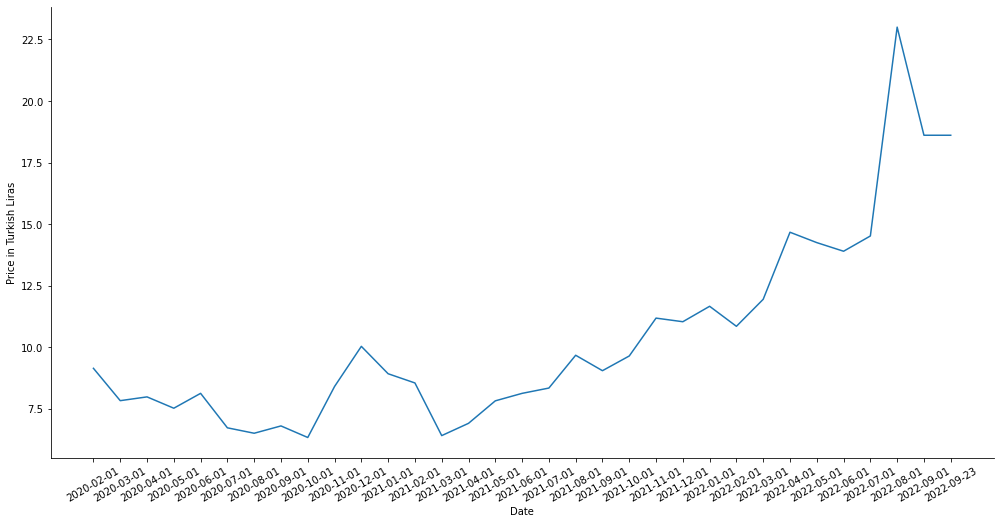

In [16]:
g = sns.relplot(data= stock_hist, kind= "line", x= "Date", y= "Adj Close",height=7, aspect=2, row_order = 45)
g.set_titles("denem")
g.set_axis_labels("Date","Price in Turkish Liras")
g.set_xticklabels(rotation=30)

In [17]:
stock_hist["High_Low"] = (stock_hist["High"] + stock_hist["Low"]) /2

In [19]:
stock_hist.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High_Low
0,2020-02-01,11.96,12.62,8.79,9.54,9.146201,854973062,10.705
1,2020-03-01,9.90,10.62,6.76,8.17,7.832754,1970202565,8.690
2,2020-04-01,7.99,8.94,7.47,8.33,7.986149,2538130051,8.205
3,2020-05-01,8.33,8.33,7.51,7.85,7.525962,2083406205,7.920
4,2020-06-01,7.93,8.65,7.89,8.48,8.129956,3176554221,8.270


In [20]:
P_and_N = []
for x in range(0,len(stock_hist)):
    if (stock_hist.iloc[x]["High_Low"] > stock_hist.iloc[x]["Open"]):
        P_and_N.append("Positive")
    else:
        P_and_N.append("Negative")
        
stock_hist["Positive/Negative"] = P_and_N

In [21]:
stock_hist.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High_Low,Positive/Negative
0,2020-02-01,11.96,12.62,8.79,9.54,9.146201,854973062,10.705,Negative
1,2020-03-01,9.90,10.62,6.76,8.17,7.832754,1970202565,8.690,Negative
2,2020-04-01,7.99,8.94,7.47,8.33,7.986149,2538130051,8.205,Positive
3,2020-05-01,8.33,8.33,7.51,7.85,7.525962,2083406205,7.920,Negative
4,2020-06-01,7.93,8.65,7.89,8.48,8.129956,3176554221,8.270,Positive


In [25]:
income_value = pd.read_csv("/Users/batuhanyolver/Downloads/GARANT_BBVA1.csv", on_bad_lines = "skip", sep= ";")

In [27]:
type(income_value)

pandas.core.frame.DataFrame

In [28]:
income_value.head()

,TÜRKİYE GARANTİ BANKASI A.Ş.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,Statement of Financial Position (Balance Sheet),2019/12,2020/12,2021/12,2022/06
2,Presentation Currency,1000TL,1000TL,1000TL,1000TL
3,Nature of Financial Statements,Consolidated,Consolidated,Consolidated,Consolidated
4,Financial Assets (Net),108.960.421,137.151.179,298.173.164,354.696.081


In [29]:
income_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   TÜRKİYE GARANTİ BANKASI A.Ş.  49 non-null     object
 1   Unnamed: 1                    49 non-null     object
 2   Unnamed: 2                    49 non-null     object
 3   Unnamed: 3                    49 non-null     object
 4   Unnamed: 4                    49 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


In [32]:
our = [1,4,14,21,30,31,38,45,49]
list1 = []

for y in our:
    list1.append([x for x in income_value.loc[y]])
df1 = pd.DataFrame(list1, columns = list1[0] )

In [33]:
df1

,Statement of Financial Position (Balance Sheet),2019/12,2020/12,2021/12,2022/06
0,Statement of Financial Position (Balance Sheet),2019/12,2020/12,2021/12,2022/06
1,Financial Assets (Net),108.960.421,137.151.179,298.173.164,354.696.081
2,Total Assets,428.554.148,540.912.805,849.397.311,1.096.074.926
3,Derivative Financial Liabilities,4.239.665,8.536.890,13.428.735,17.947.297
4,Equity,54.050.747,62.409.195,79.222.566,112.088.040
5,Total Equity and Liabilities,428.554.148,540.912.805,849.397.311,1.096.074.926
6,Trading Income or Loss (net),-1.806.062,702.894,4.735.886,5.935.748
7,Net Profit (Loss),6.241.390,6.385.163,13.059.731,21.181.023
8,Total Comprehensive Income (Loss),7.134.361,8.373.066,17.306.255,33.083.534


In [34]:
xbank_hist = pd.read_csv("/Users/batuhanyolver/Downloads/XBANK.IS (2).csv")

#### XBANK Stock Value
XBANK is total value of bank indexing in BIST stock market. For evaluation among GARANTI BBVA and other banks; we use this data. The xbank data collected from Yahoo finance. 

In [35]:
xbank_hist.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-01,174147.406250,183478.703125,131270.500000,139920.593750,139920.593750,10544800
1,2020-03-01,144565.906250,155995.796875,105551.203125,117559.898438,117559.898438,12075300
2,2020-04-01,115255.500000,129159.500000,111749.898438,123426.703125,123426.703125,13608800
3,2020-05-01,122188.203125,123007.500000,117202.500000,122080.703125,122080.703125,10639000
4,2020-06-01,123332.796875,135696.500000,122796.500000,133474.203125,133474.203125,21835700


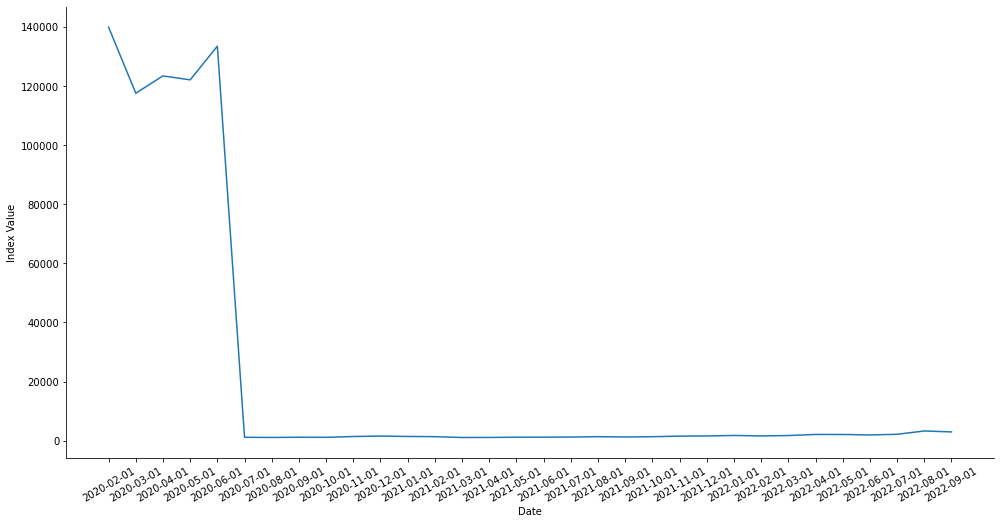

In [36]:
g1 = sns.relplot(data= xbank_hist, kind= "line", x= "Date", y= "Close",height=7, aspect=2, row_order = 45)
g1.set_titles("denem")
g1.set_axis_labels("Date","Index Value")
g1.set_xticklabels(rotation=30)

Text(0.5, 1.0, 'Monthly Volumes')

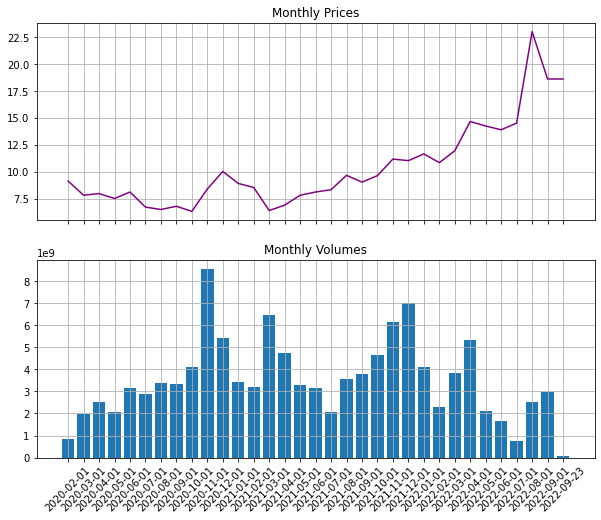

In [37]:
volume = stock_hist[["Volume", "Date"]]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))

ax1.plot(stock_hist["Adj Close"], color='purple')
ax1.grid(True)
ax1.set_title("Monthly Prices")


ax2.bar(volume["Date"], volume["Volume"])
ax2.grid(True)
plt.xticks(rotation=45)
ax2.set_title("Monthly Volumes")

Text(0.5, 1.0, 'XBank Monthly Prices')

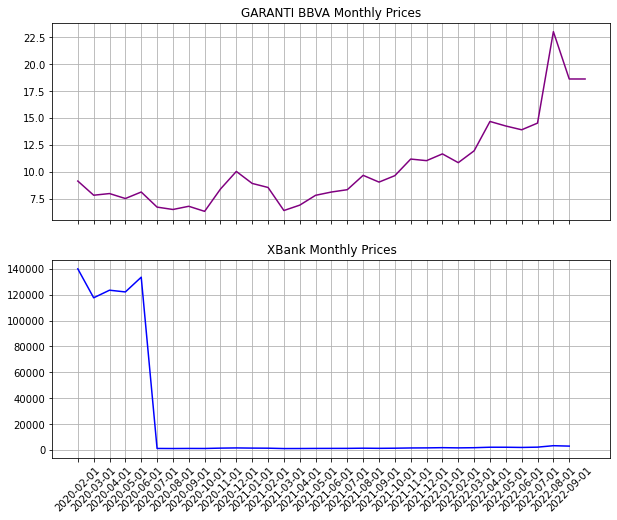

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))

ax1.plot(stock_hist["Adj Close"], color='purple')
ax1.grid(True)
ax1.set_title("GARANTI BBVA Monthly Prices")

ax2.plot(xbank_hist["Date"], xbank_hist["Adj Close"], color ="blue")
ax2.grid(True)
plt.xticks(rotation=45)
ax2.set_title("XBank Monthly Prices")

In [42]:
from collections import deque
our = [1,4,14,21,30,31,38,45,49]
list1 = []

for y in our:
    if y != 1:    
        a = ([x for x in income_value.loc[y]])
        a_1 = [int(str(x).replace(".","")) for x in a[1:]]
        a_1 = deque(a_1)
        a_1.appendleft(a[0])
        list1.append(a_1)
    else:
        list1.append([x for x in income_value.loc[y]])
df2 = pd.DataFrame(list1, columns = list1[0] )

In [43]:
df2

,Statement of Financial Position (Balance Sheet),2019/12,2020/12,2021/12,2022/06
0,Statement of Financial Position (Balance Sheet),2019/12,2020/12,2021/12,2022/06
1,Financial Assets (Net),108960421,137151179,298173164,354696081
2,Total Assets,428554148,540912805,849397311,1096074926
3,Derivative Financial Liabilities,4239665,8536890,13428735,17947297
4,Equity,54050747,62409195,79222566,112088040
5,Total Equity and Liabilities,428554148,540912805,849397311,1096074926
6,Trading Income or Loss (net),-1806062,702894,4735886,5935748
7,Net Profit (Loss),6241390,6385163,13059731,21181023
8,Total Comprehensive Income (Loss),7134361,8373066,17306255,33083534


In [44]:
def change_calculate(data,x):
    a = data.iloc[x][1]
    b = data.iloc[x][2]
    c = data.iloc[x][3]
    d = data.iloc[x][4]
    chn1 = (100*(b-a))/a
    if b > a: 
        chn1 = abs(chn1)
    chn2 = (100*(c-b))/b
    if c > b:
        chn2 = abs(chn2)
    chn3 = (100*(d-c))/c
    if d > c:
        chn3 = abs(chn3)
    new_list = [[chn1, chn2, chn3]]
    dfA = pd.DataFrame(new_list, columns= ["2019/2020","2020/2021","2021/2022"])
    dfA =dfA.rename(index={0:data.iloc[x][0]})
    dfA = dfA.rename(index= lambda s: s + " (change %)")
    return dfA    

In [45]:
datframe = pd.DataFrame()
for x in range(1,len(df1)):
    dataframe = change_calculate(df2,x)
    datframe = pd.concat([datframe, dataframe])

In [46]:
datframe

,2019/2020,2020/2021,2021/2022
Financial Assets (Net) (change %),25.872475,117.404740,18.956406
Total Assets (change %),26.218077,57.030357,29.041488
Derivative Financial Liabilities (change %),101.357654,57.302425,33.648456
Equity (change %),15.464075,26.940535,41.484991
Total Equity and Liabilities (change %),26.218077,57.030357,29.041488
Trading Income or Loss (net) (change %),138.918597,573.769587,25.335534
Net Profit (Loss) (change %),2.303541,104.532461,62.185753
Total Comprehensive Income (Loss) (change %),17.362522,106.689581,91.165183


In [47]:
datframe.max()

2019/2020    138.918597
2020/2021    573.769587
2021/2022     91.165183
dtype: float64

In [48]:
datframe[datframe["2019/2020"]== datframe.max()[0]]

,2019/2020,2020/2021,2021/2022
Trading Income or Loss (net) (change %),138.918597,573.769587,25.335534


In [49]:
datframe[datframe["2020/2021"] == datframe.max()[1]]

,2019/2020,2020/2021,2021/2022
Trading Income or Loss (net) (change %),138.918597,573.769587,25.335534


In [50]:
datframe[datframe["2021/2022"] == datframe.max()[2]]

,2019/2020,2020/2021,2021/2022
Total Comprehensive Income (Loss) (change %),17.362522,106.689581,91.165183


In [129]:
data1_1 = datframe[datframe["2020/2021"] == datframe.max()[1]]

In [151]:
data1_2 = datframe[datframe["2021/2022"] == datframe.max()[2]]

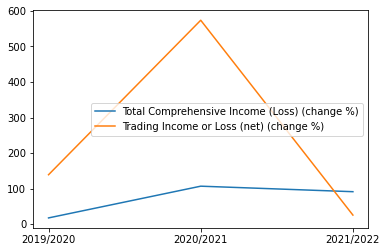

In [153]:
fig , ax = plt.subplots()
y1 = [data1_1.iloc[0][0],data1_1.iloc[0][1],data1_1.iloc[0][2]]
x1 = [x for x in data1_1.keys()]

y2 = [data1_2.iloc[0][0],data1_2.iloc[0][1],data1_2.iloc[0][2]]
x2 = [x for x in data1_2.keys()]

plt.plot(x2 ,y2, label= "Total Comprehensive Income (Loss) (change %)")
plt.plot(x1, y1, label ="Trading Income or Loss (net) (change %)")
plt.legend()
plt.show()